Things we are going to do in this project:
-->How to identify when preprocessing is needed and how to apply it
-->How to establish a benchmark for a solution to the problem
-->what each of several supervised learning algorithms accomplishes for a specific dataset
-->How to investigate whether a candidate solution model is adequate for the problem

In [26]:
#Importing the libraries 
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
%matplotlib inline
data = pd.read_csv("donors.csv")
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


# Implementation : Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group,and will tell us about the percentage of these individuals making more than $50,000

In [27]:
#Total number of records
n_records = data.shape[0]

#number of records where individual's income is more than $50,000
n_greater_50k = data[data['income']=='>50K'].shape[0]

#number of records where individual's income is atmost $50,000
n_at_most_50k = data[data['income']=='<=50K'].shape[0]

#Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/ n_records) * 100

#Print the results
print('Total number of records: {}'.format(n_records))
print('Individuals making more than $50,000: {}'.format(n_greater_50k))
print('Individuals making atmost $50,000: {}'.format(n_at_most_50k))
print('Percentage of individuals making more than $50,000: {}%'.
                 format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making atmost $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

C:\Users\Administrator\Desktop\visuals.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


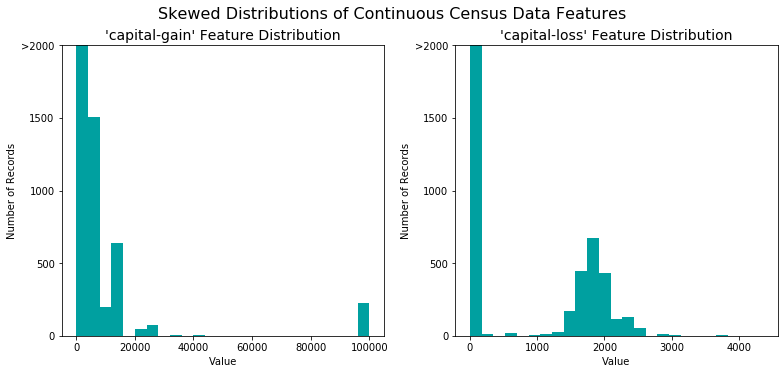

In [28]:
#Preparing the data
#split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income',axis = 1)
#Visualize skewed continuous features of original data
import visuals as vs
vs.distribution(data)

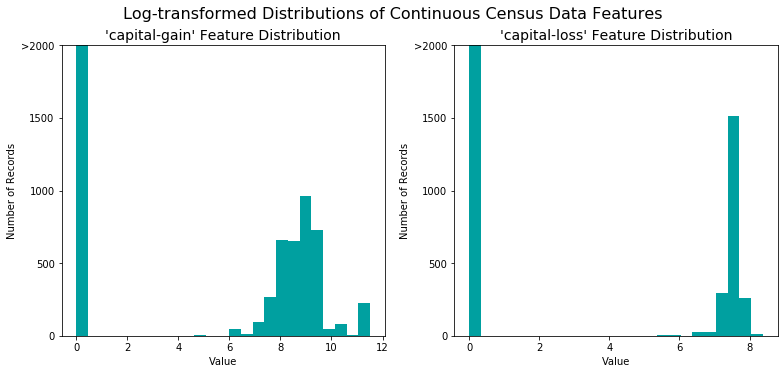

In [29]:
#Log-transform the skewed features
skewed = ['capital-gain','capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x:
                                                              np.log(x+1))
#Visualize the new log distributions
vs.distribution(features_log_transformed,transformed = True)

#Normalizing Numerical features in addition to performing transformations on features that are highly skewed,it is often good practice some type of scaling on numerical features.Applying a scaling to the data doesnot change the shape of the feature.Note that once scaling is applied observing the data in its raw form will no longer have the same original meaning

In [30]:
from sklearn.preprocessing import MinMaxScaler

#Initialize a scaler,then apply it to features
scaler = MinMaxScaler()
numerical = ['age','education-num','capital-gain','capital-loss',\
            'hours-per-week']
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform
(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,<bound method TransformerMixin.fit_transform o...,State-gov,Bachelors,<bound method TransformerMixin.fit_transform o...,Never-married,Adm-clerical,Not-in-family,White,Male,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,United-States
1,<bound method TransformerMixin.fit_transform o...,Self-emp-not-inc,Bachelors,<bound method TransformerMixin.fit_transform o...,Married-civ-spouse,Exec-managerial,Husband,White,Male,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,United-States
2,<bound method TransformerMixin.fit_transform o...,Private,HS-grad,<bound method TransformerMixin.fit_transform o...,Divorced,Handlers-cleaners,Not-in-family,White,Male,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,United-States
3,<bound method TransformerMixin.fit_transform o...,Private,11th,<bound method TransformerMixin.fit_transform o...,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,United-States
4,<bound method TransformerMixin.fit_transform o...,Private,Bachelors,<bound method TransformerMixin.fit_transform o...,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,Cuba


In [31]:
#One-hot encode the 'features_log_minmax_transform' data using #pandas.get_dummies()

features_final = pd.get_dummies(features_log_minmax_transform)

#Encode the 'income_raw' data into numerical values
income = income_raw.map({'<=50K':0,'>50K':1})

#print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
encoded

103 total features after one-hot encoding


['age_<bound method TransformerMixin.fit_transform of MinMaxScaler(copy=True, feature_range=(0, 1))>',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_level_ 10th',
 'education_level_ 11th',
 'education_level_ 12th',
 'education_level_ 1st-4th',
 'education_level_ 5th-6th',
 'education_level_ 7th-8th',
 'education_level_ 9th',
 'education_level_ Assoc-acdm',
 'education_level_ Assoc-voc',
 'education_level_ Bachelors',
 'education_level_ Doctorate',
 'education_level_ HS-grad',
 'education_level_ Masters',
 'education_level_ Preschool',
 'education_level_ Prof-school',
 'education_level_ Some-college',
 'education-num_<bound method TransformerMixin.fit_transform of MinMaxScaler(copy=True, feature_range=(0, 1))>',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Ma

Shuffle and Split Data
Now all categorical variables have been converted into numerical features
and all numerical features have been normalized.As always,we will now split the data(both features and their labels)into training and test sets.

In [9]:
#import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features_final,income,\
                                                test_size = 0.2,random_state = 0)
#show the results of the split
print("Training set has {} samples:".format(X_train.shape[0]))
print("Testing set has {} samples:".format(X_test.shape[0]))

Training set has 36177 samples:
Testing set has 9045 samples:


In [11]:
TP =np.sum(income) #Counting the ones as this is the naive case.
#Note that 'income' is the 'income_raw' data encoded into numerical values
#Done in the DataPreprocessing step
FP = income.count() - TP #Specific to the naive case
TN = 0 #No predicted negatives in the naive case
FN = 0 #No predicted negatives

#Calculate accuracy,precision and recall
accuracy = TP/(TP+FP+TN+FN)
recall = TP/(TP + FN)
precision = TP/(TP+FP)
#calculate F-score using the formula for beta = 0.5
beta = 0.5
fscore = (1 + beta**2) * ((precision * recall)/((beta**2)*precision + recall))

#print the results
print("Naive Predictor: [Accuracy Score: {:.4f},F-Score: {:.4f}]"\
      .format(accuracy,fscore))

Naive Predictor: [Accuracy Score: 0.2478,F-Score: 0.2917]


In [15]:
from sklearn.metrics import fbeta_score,accuracy_score

def train_predict(learner,sample_size,X_train,y_train,X_test,y_test):
    '''
    inputs:
    -learner : the learning algorithm to be trained and predicted on
    -sample_size :the size of samples to be drawn from training set
    -X_train :features training set
    -y_train : income traing set
    -X_test : features testing set
    -y_test : income testing test'''
    
    results = {}
    
    #fit the learner to the training data using slicing with 'sample_size'
    #using .fit(training_features[:],
    #training_labels[:]
    
    start = time()
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time()
    
    #calculate the training time
    results['train_time'] = end - start
    
    #get the prediction on the test set(X_test)
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    
    #calculate the total prediction time
    results['pred_time'] = end - start
    
    #compute the accuracy on the first 300 training samples 
    
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
    
    #compute the accuacy on the test set using accuracy_score
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    #compute the F-Score for the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta = 0.5)
    
    results['f_test'] = fbeta_score(y_test,predictions_test,beta = 0.5)
    
    print("{} trained on {} samples:".format(learner.__class__.__name__,\
                                            sample_size))
    
    return results


#Implementation : Initial Model Evaluation


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 361 samples:
RandomForestClassifier trained on 3617 samples:
RandomForestClassifier trained on 36177 samples:
GaussianNB trained on 361 samples:
GaussianNB trained on 3617 samples:
GaussianNB trained on 36177 samples:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 361 samples:
SVC trained on 3617 samples:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 36177 samples:


C:\Users\Administrator\Desktop\visuals.py:110: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


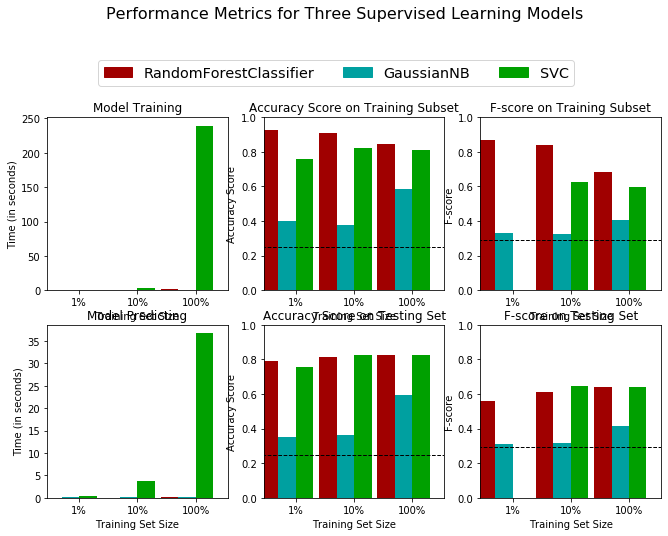

In [16]:
#import the three supervised learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#initialize the three models
random_state = 42

clf_A = RandomForestClassifier(random_state=random_state)
clf_B =GaussianNB()
clf_C = SVC(random_state=random_state)

#calculate the number of samples for 1%,10% and 100% of the traing data

samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

#collect the results on learners
results = {}
for clf in [clf_A,clf_B,clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i,samples in enumerate([samples_1,samples_10,samples_100]):
        results[clf_name][i] = \
        train_predict(clf,samples,X_train,y_train,X_test,y_test)

#run metrics visualization for the 3 supervised learing models
vs.evaluate(results,accuracy,fscore)

Improving Results:
In this final section,we will choose from the three supervised learning models the best model to use on the data.We will then perform a gridsearch optimization for the model over the entire training set(X_train and y_train) by tuning parameters to improve upon the untuned models F-Score

In [19]:
#Model Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
#Intialize the classfier
clf = RandomForestClassifier(random_state = 42)

#Create the parameters list you wish to apply

parameters = {
    'max_depth':[10,20,30,40],
    'max_features':[2,3],
    'min_samples_leaf':[3,4,5], 
    'min_samples_split':[8,10,12],
    'n_estimators':[50,100,150]}

scorer = make_scorer(fbeta_score,beta = 0.5)
grid_obj = GridSearchCV(estimator = clf,param_grid = parameters,scoring = scorer,n_jobs = -1)

grid_fit = grid_obj.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_

#make predictions using the unoptimized and model
predictions = (clf.fit(X_train,y_train).predict(X_test))
best_predictions = best_clf.predict(X_test)

#Report the before and after scores
print("Unoptimized model\n---------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test,predictions)))
print("F-Score on testing data: {:.4f}".format(fbeta_score(y_test,predictions,beta =0.5)))

print("\nOptimized model\n-------")
print("Final Accuracy score on the testing data: {:.4f}".
     format(accuracy_score(y_test,best_predictions)))
print("Final F-score on the testing data: {:.4f}".
     format(fbeta_score(y_test,best_predictions,beta = 0.5)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Unoptimized model
---------
Accuracy score on testing data: 0.8230
F-Score on testing data: 0.6390

Optimized model
-------
Final Accuracy score on the testing data: 0.8235
Final F-score on the testing data: 0.6447


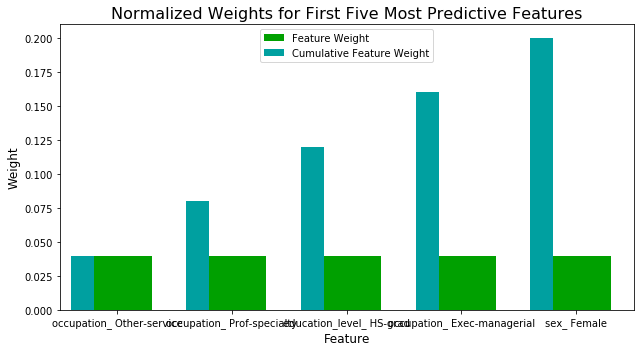

In [32]:
#Feature importances
from sklearn.ensemble import AdaBoostClassifier

#Train the model on the training data 
model = AdaBoostClassifier().fit(X_train,y_train)

#Extract the feature importances using .feature_importances_

importances = model.feature_importances_

#plot
vs.feature_plot(importances,X_train,y_train)

In [24]:
#Constructs a new estimator with the same parameters,does a deep copy of the model
#in an estimator without copying attached data
from sklearn.base import clone

#Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])]]                                                 

#Train on the "best" model found from gridsearch
clf = (clone(best_clf)).fit(X_train_reduced,y_train)
#Make new predictions
reduced_predictions = clf.predict(X_test_reduced)
#Report scores
print("Final model trained on full data\n---------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test,best_predictions)))
print("F-Score on testing data: {:.4f}".format(fbeta_score(y_test,best_predictions,beta =0.5)))
print("\nFinal model on reduced data\n-------")
print("Final Accuracy score on the testing data: {:.4f}".
     format(accuracy_score(y_test,reduced_predictions)))
print("Final F-score on the testing data: {:.4f}".
     format(fbeta_score(y_test,reduced_predictions,beta = 0.5)))

Final model trained on full data
---------
Accuracy score on testing data: 0.8235
F-Score on testing data: 0.6447

Final model on reduced data
-------
Final Accuracy score on the testing data: 0.8248
Final F-score on the testing data: 0.6481
